### Setup environment

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten 
from tensorflow.keras.datasets import mnist
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
from sklearn.metrics import roc_auc_score 
import mlflow
import mlflow.tensorflow

2025-09-02 16:31:24.665996: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-02 16:31:24.733804: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-02 16:31:25.362289: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-02 16:31:25.913306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-02 16:31:26.311245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:

print("TensorFlow: {}".format(tf.__version__))
print("Scikit-Learn: {}".format(sklearn.__version__))
print("Numpy: {}".format(np.__version__))
print("MLFlow: {}".format(mlflow.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))

TensorFlow: 2.17.0
Scikit-Learn: 1.7.1
Numpy: 1.26.4
MLFlow: 3.3.2
Matplotlib: 3.10.6


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Class:  5


(<matplotlib.image.AxesImage at 0x7fd70e36fa50>, None)

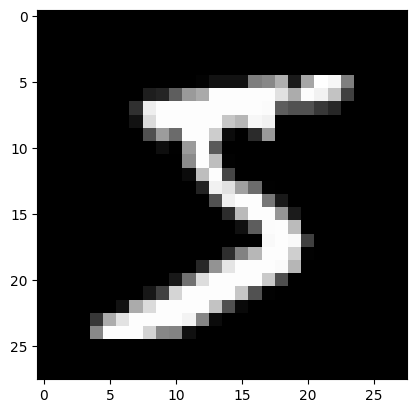

In [4]:
plt.imshow(x_train[0], cmap='gray'), print("Class: ", y_train[0])

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],
x_test.shape[2], 1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
print("Shapes")
print("x_train: {}\ny_train: {}".format(x_train.shape,y_train.shape))
print("x_test: {}\ny_test: {}".format(x_test.shape,y_test.shape))

Shapes
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test: (10000, 28, 28, 1)
y_test: (10000, 10)


### MLFlow Run - Training and Evaluation

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, strides=2,padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(filters=8, kernel_size=3, strides=2,padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(Flatten())
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

/home/hicham/MLflow-Workshop/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │        11,790 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,940 (54.45 KB)

 Trainable params: 13,940 (54.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer="Adam",loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
mlflow.set_tracking_uri('http://localhost:8080')
mlflow.set_experiment("TF_Keras_MNIST") 

2025/09/02 16:32:33 INFO mlflow.tracking.fluent: Experiment with name 'TF_Keras_MNIST' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/666278922959015132', creation_time=1756823553373, experiment_id='666278922959015132', last_update_time=1756823553373, lifecycle_stage='active', name='TF_Keras_MNIST', tags={}>

In [10]:
with mlflow.start_run():
    mlflow.tensorflow.autolog()
    model.fit(x=x_train, y=y_train, batch_size=256, epochs=10)
    preds = model.predict(x_test)
    preds = np.round(preds)
    eval_acc = model.evaluate(x_test, y_test)[1]
    auc_score = roc_auc_score(y_test, preds)
    print("eval_acc: ", eval_acc)
    print("auc_score: ", auc_score)
    mlflow.tensorflow.mlflow.log_metric("eval_acc", eval_acc)
    mlflow.tensorflow.mlflow.log_metric("auc_score", auc_score)
mlflow.end_run()

Epoch 1/10
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4910 - loss: 2.3901

2025/09/02 16:32:55 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.6907 - loss: 1.1561
Epoch 2/10
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9103 - loss: 0.2944

2025/09/02 16:33:02 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9247 - loss: 0.2503
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9507 - loss: 0.1593

2025/09/02 16:33:10 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9537 - loss: 0.1490
Epoch 4/10
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9647 - loss: 0.1148

2025/09/02 16:33:18 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9655 - loss: 0.1116
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9722 - loss: 0.0911

2025/09/02 16:33:28 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9720 - loss: 0.0907
Epoch 6/10
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9763 - loss: 0.0764

2025/09/02 16:33:38 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9764 - loss: 0.0745
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9803 - loss: 0.0626

2025/09/02 16:33:45 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9794 - loss: 0.0650
Epoch 8/10
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9821 - loss: 0.0556

2025/09/02 16:33:52 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9818 - loss: 0.0563
Epoch 9/10
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9844 - loss: 0.0488

2025/09/02 16:34:00 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9838 - loss: 0.0493
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9866 - loss: 0.0418

2025/09/02 16:34:07 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9862 - loss: 0.0429


2025/09/02 16:34:07 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2025/09/02 16:34:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/02 16:34:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/09/02 16:34:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9794 - loss: 0.0685
eval_acc:  0.9793999791145325
auc_score:  0.9877587267997235
🏃 View run omniscient-bird-752 at: http://localhost:8080/#/experiments/666278922959015132/runs/714ea04f3d264971890e55458de65c07
🧪 View experiment at: http://localhost:8080/#/experiments/666278922959015132


### Evaluate the Model

In [11]:
# ===== Evaluate on the test set and log to MLflow =====
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)
import mlflow

# If not already set in a previous cell, keep the same tracking/expe name
# mlflow.set_tracking_uri("http://localhost:8080")
# mlflow.set_experiment("TF_Keras_MNIST")

with mlflow.start_run(run_name="eval"):
    # 1) raw metrics
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    y_prob = model.predict(x_test, verbose=0)          # shape (10000, 10)
    y_pred = y_prob.argmax(axis=1)                     # predicted labels
    y_true = y_test.argmax(axis=1)                     # true labels

    mlflow.log_metric("test_loss", float(test_loss))
    mlflow.log_metric("test_acc",  float(test_acc))

    # 2) AUC (multiclass)
    auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr")
    auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo")
    mlflow.log_metric("test_auc_ovr", float(auc_ovr))
    mlflow.log_metric("test_auc_ovo", float(auc_ovo))

    # 3) Confusion matrix (as artifact)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, cmap="Blues")
    ax.figure.colorbar(im, ax=ax)
    ax.set_title("Confusion matrix - MNIST")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(range(10)); ax.set_yticks(range(10))
    fig.tight_layout()
    fig.savefig("confusion_matrix.png", bbox_inches="tight")
    plt.close(fig)
    mlflow.log_artifact("confusion_matrix.png")

    # 4) ROC (micro-average) as artifact
    RocCurveDisplay.from_predictions(
        y_test.ravel(), y_prob.ravel(), name="micro-average"
    )
    plt.title("ROC curve (micro-average)")
    plt.savefig("roc_micro.png", bbox_inches="tight")
    plt.close()
    mlflow.log_artifact("roc_micro.png")

    # 5) Classification report (text) as artifact
    report_txt = classification_report(y_true, y_pred)
    with open("classification_report.txt", "w") as f:
        f.write(report_txt)
    mlflow.log_artifact("classification_report.txt")

print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f} | AUC(ovr): {auc_ovr:.4f}")



🏃 View run eval at: http://localhost:8080/#/experiments/666278922959015132/runs/af7afc424807492ba74c8afeb485441a
🧪 View experiment at: http://localhost:8080/#/experiments/666278922959015132
Test loss: 0.0685 | Test acc: 0.9794 | AUC(ovr): 0.9996


In [13]:
eval_loss, eval_acc = model.evaluate(x_test, y_test)
preds = model.predict(x_test)
preds = np.round(preds)
eval_auc = roc_auc_score(y_test, preds)
print("Eval Loss:", eval_loss)
print("Eval Acc:", eval_acc)
print("Eval AUC:", eval_auc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9794 - loss: 0.0685
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Eval Loss: 0.06852187216281891
Eval Acc: 0.9793999791145325
Eval AUC: 0.9877587267997235
